In [1]:
import os, glob
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
data = []
for file in glob.glob(os.path.join('experiments', 'lstm', '*')):
    if file.endswith('.csv'):
        data.append(np.genfromtxt(file, delimiter=',', dtype=float, skip_header=True))
data = np.array(data)

In [3]:
train_accs, val_accs = data[:, :, 1], data[:, :, 3]

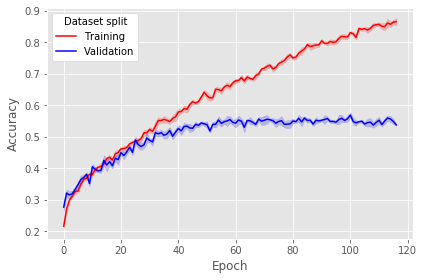

In [4]:
plt.figure(figsize=(6, 4))

# Training accuracy curve
train_means, train_errs = train_accs.mean(axis=0), train_accs.std(axis=0) / np.sqrt(5)
plt.plot(train_means, color='r', label='Training')
plt.fill_between(range(len(train_means)), train_means-train_errs, train_means+train_errs, alpha=.2, color='r')

# Validation accuracy curve
val_means, val_errs = val_accs.mean(axis=0), val_accs.std(axis=0) / np.sqrt(5)
plt.plot(val_means, color='b', label='Validation')
plt.fill_between(range(len(val_means)), val_means-val_errs, val_means+val_errs, alpha=.2, color='b')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(title='Dataset split', facecolor='white', framealpha=1)
plt.tight_layout()
plt.savefig('training-curve.pdf')
plt.show()